<a href="https://colab.research.google.com/github/Sriharish19/EDA-Hotel-Booking-Capstone-Project-1/blob/main/Copy_of_SH_Hotel_Booking_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialization
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Data frame mounting
df=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')
df1=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

Mounted at /content/drive


In [ ]:
# Counting the total null values in each columns
count = df1.isnull().sum()
#Percentage of total null values in each columns
percentage = round(count/df1.isnull().count(),4) *100
#concating the count and percentage
df_temp = pd.concat([count,percentage], axis = 1, keys = ['null_count', 'null_percent'])
df_temp

In [ ]:
df.head(15)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# DATA CLEANING -removing null values & changing children column to int type
df['children'] = df['children'].replace(np.nan, 0)
df['country'] = df['country'].replace(np.nan, 'no country')
df['agent'] = df['agent'].replace(np.nan, 0)
df.drop('company',axis=1,inplace=True)

df["children"]=df["children"].astype(int)

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
#Function to convert month_name to month_number

def num_month(month_name):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=['01','02','03','04','05','06','07','08','09','10','11','12']
  return(n[m.index(month_name)])

#Function to convert single_digit_date to double_digit_date

def date_two_digit(single_digit_date):
  if single_digit_date<10:
    c=[1,2,3,4,5,6,7,8,9]
    d=['01','02','03','04','05','06','07','08','09']
    return(d[c.index(single_digit_date)])
  else:
    return(single_digit_date)

In [ ]:
#Applying num_month function to df
df['month_num'] = df['arrival_date_month'].apply(num_month)
#Applying date_two_digit function to df
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].apply(date_two_digit)
#Assigning month_num to arrival_date_month
df['arrival_date_month'] = df['month_num']
#droping month_num
df.drop(['month_num'], axis = 1, inplace = True)

In [ ]:
#Concating columns to get date in str format
df['date_'] = df['arrival_date_year'].astype(str)+ '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str) 

#Converting the date from str to DATE format 
df['date'] = pd.to_datetime(df.date_)

#droping temporary column
df.drop(['date_'], axis = 1,inplace=True)

In [ ]:
# Pie Chart representing Bookings 

values= df['hotel'].value_counts().tolist()
labe = df['hotel'].value_counts().index.tolist()

plt.pie(values ,labels=labe , radius=1,explode = [0,0.1],colors=['lightgreen','lightblue'] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
plt.rcParams['figure.figsize']=(9,7)
plt.title('Booking split')
plt.show()

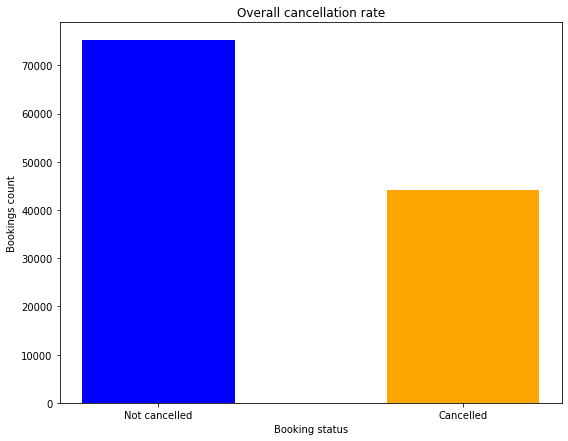

In [ ]:
y=df['is_canceled'].value_counts().tolist()
z=['Not cancelled','Cancelled']
plt.ylabel('Bookings count')
plt.xlabel('Booking status')
plt.title('Overall cancellation rate')
plt.bar(z,y,width=0.5,color=['blue','orange'])
plt.rcParams['figure.figsize']=(9,7)
plt.show()

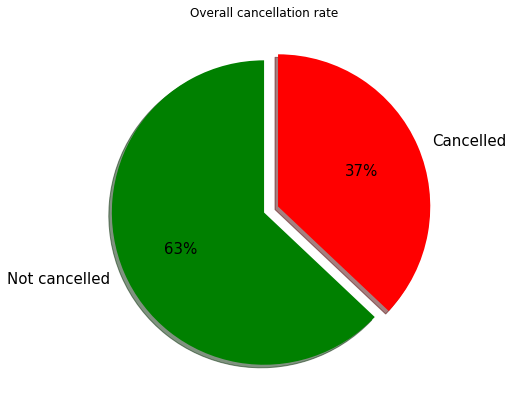

In [ ]:
plt.pie(y ,labels=z ,explode = [0,0.1],colors=['green','red'],radius=1,startangle=90,textprops={'fontsize': 15}, autopct='%0.0f%%',shadow=True)
plt.title('Overall cancellation rate')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

In [ ]:
#Extracting required columns

df_new= df[['hotel','is_canceled']]
dx=df_new.value_counts().tolist()
dy=['City Hotel','Resort Hotel']

#dx=[46228, 33102, 28938, 11122]

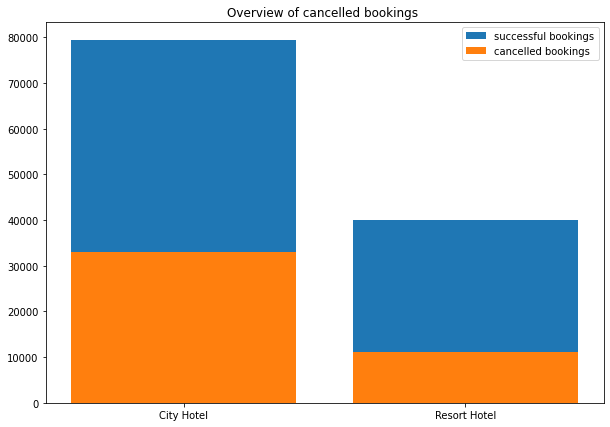

In [ ]:
# Plotting Overview of cancelled bookings with repect to hotel types # Bar graph

yy=df['hotel'].value_counts().tolist()
plt.bar(dy,yy,label='successful bookings')
plt.bar(dy,dx[1::2],label='cancelled bookings')
plt.title('Overview of cancelled bookings ')
plt.legend()
plt.rcParams['figure.figsize']=(9,7)
plt.show()

In [ ]:
def interchange(z):
  if z==0:
    return 1
  else:
    return 0

bb=df.loc[:,['is_canceled','country']]
bb['is_canceled']=bb['is_canceled'].apply(interchange)
cx_country= bb[bb['is_canceled'] == 1].groupby(['country']).sum().reset_index()
cx_country.rename({'is_canceled':'cx_count'},axis=1,inplace=True)

In [ ]:
# Importing  Plotly.express to plot a choropleth map
import plotly.express as px

fig=px.choropleth(cx_country, locations = 'country',color= "cx_count", hover_name= "country",scope='world',title="Home country of visitors")
fig.show()

In [ ]:
# Europe market without portugal
cc=df.loc[:,['is_canceled','country']]
cc['is_canceled']=cc['is_canceled'].apply(interchange)
dd=cc.groupby(df['country']).sum().sort_values(by='is_canceled',ascending=False).reset_index().query('is_canceled < 10000')
dd.rename({'is_canceled':'cx_count'},axis=1,inplace=True)


In [ ]:
# Europe market 
fig=px.choropleth(dd, locations = 'country',color= 'cx_count', hover_name= 'country',scope='europe',title='Home country of visitors')
fig.show()

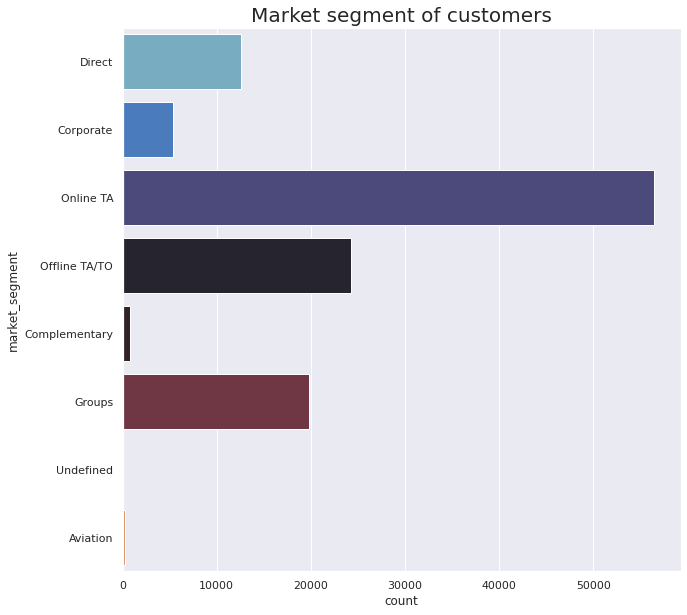

In [ ]:
#Plotting Market segment of customers using seaborn

plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
sns.countplot(data=df, y ='market_segment',palette='icefire').set_title('Market segment of customers', fontsize = 20)
plt.show()

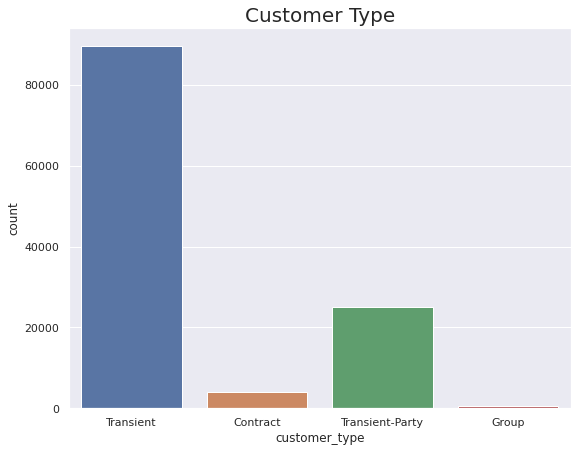

In [ ]:
# Plotting customer type using Sea born----Bar graph
fig=sns.countplot(data =df, x = 'customer_type')
fig.set_title('Customer Type', fontsize = 20)
plt.rcParams['figure.figsize']=(3,3)
plt.show()

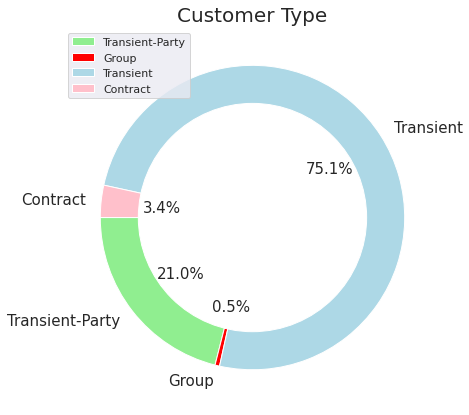

In [84]:
# Plotting customer type using plotly----Pie chart
ee=df.loc[:,['customer_type']].groupby(['customer_type']).size().reset_index()
ee.rename({0:'count'},axis=1,inplace=True)
ff=ee.iloc[[3,1,2,0],[1,0]]

#pie plotting
plt.pie(ff['count']  ,labels=ff['customer_type'],colors=['lightgreen','red','lightblue','pink'],radius=1,startangle=180,textprops={'fontsize': 15},
        autopct='%0.1f%%')
plt.legend(loc='upper left')
plt.title('Customer Type',fontsize = 20)

#donut
cir=plt.Circle(xy=(0,0) , radius=0.75, facecolor='white')
plt.gca().add_artist(cir)
plt.show()

In [85]:
# Function to convert month number to month name in temporary table Adr_sum
def month_name(num_month):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=['01','02','03','04','05','06','07','08','09','10','11','12']
  return(m[n.index(num_month)])

In [86]:
# Applying function groupby and month_name
adr_sum = df.groupby(['arrival_date_month']).sum('adr').reset_index()
adr_sum['month_name'] = adr_sum['arrival_date_month'].apply(month_name)

In [87]:
# importing colors
import matplotlib.colors as mcolors

Text(0.5, 1.0, 'Revenue per month')

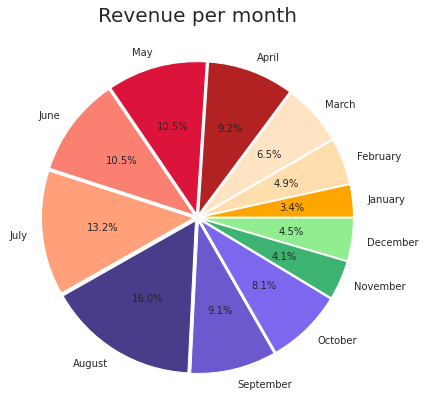

In [88]:
# Plotting the pie chart
plt.pie(adr_sum['adr'], labels = adr_sum['month_name'], explode = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025], 
        colors = ['orange','navajowhite','bisque','firebrick','crimson','salmon','lightsalmon','darkslateblue','slateblue','mediumslateblue','mediumseagreen','lightgreen'], radius = 1, textprops = {'fontsize': 10}, autopct = '%0.1f%%' )
plt.title('Revenue per month', fontsize = 20)

In [90]:
# Function to convert month(string) to numeber(int)

def num_monthx(month_name):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=[1,2,3,4,5,6,7,8,9,10,11,12]
  return(n[m.index(month_name)])


In [91]:
# average daily rate per person =  ADR/(Adults+Children)

gg=df.loc[:,['hotel','arrival_date_month','adults', 'children','adr']]
gg['arrival_date_month']=gg['arrival_date_month'].apply(month_name)
gg['Total_cx']=gg['children']+gg ['adults']

hh=gg.groupby(['arrival_date_month','hotel']).sum().reset_index()
hh['month_number']=hh['arrival_date_month'].apply(num_monthx)
hh['avg_adr_pp']=hh['adr']/hh['Total_cx']

ii=hh.sort_values(by='month_number')

Text(0.5, 1.0, 'ADR per person')

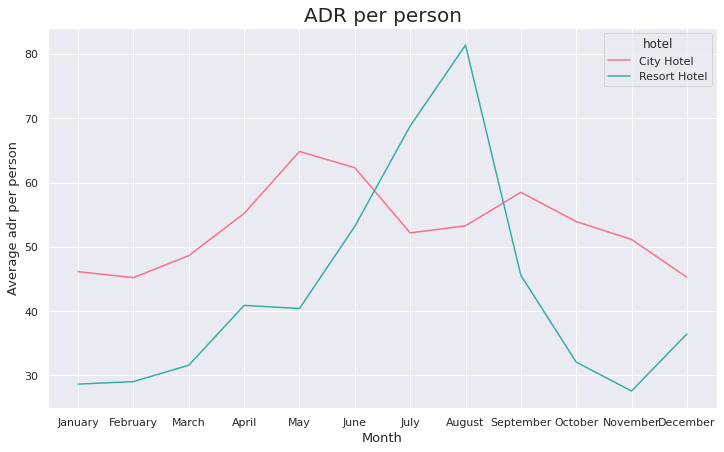

In [92]:
#Plotting adr per person for each month in sea born

sns.lineplot(data = ii, x = 'arrival_date_month', y = 'avg_adr_pp', hue = 'hotel',palette="husl")
plt.rcParams['figure.figsize']=(12,7)
plt.xlabel('Month',fontsize=13)
plt.ylabel('Average adr per person',fontsize=13)
plt.title('ADR per person',fontsize=20)

<Figure size 1440x360 with 0 Axes>

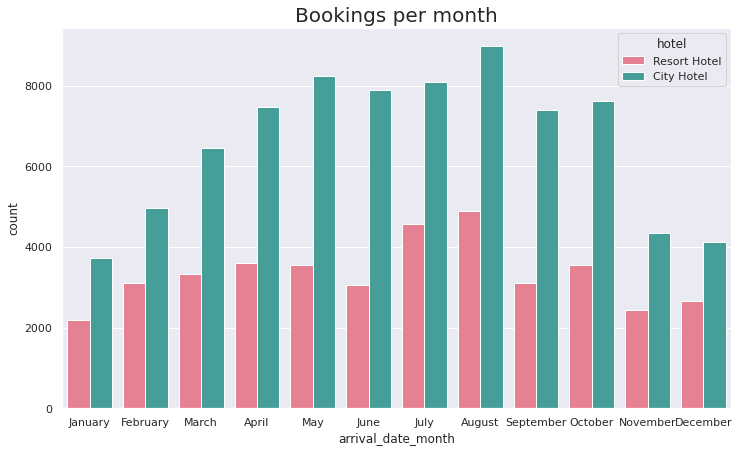

<Figure size 1440x360 with 0 Axes>

In [93]:
# Numer of bookings with respect to each month
sns.countplot(data = gg, x = 'arrival_date_month', hue = 'hotel',palette='husl', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Bookings per month',fontsize=20)
plt.figure(figsize=(20,5))
